## EEOUT files (Unstructured Meshes)

F4Enix can also parse outputs of unstrutured meshes MCNP simulation (i.e., eeout files) and export it to .vtu format.

The feature is limited for the moment to 1st and 2nd order tetraheadra with no mixed formulation. The removing of this limitations though would not take much effort and can be considered in the future if deemed necessary.

In [33]:
from f4enix.output.eeout import EEOUT
from pprint import pprint  # just to print dictionaries in a nicer way

# Parse the eeout file
eeout = EEOUT('cyl_tetra1.eeout')
pprint(eeout.info)

{'NUMBER OF 1st HEXS': 0,
 'NUMBER OF 1st PENTS': 0,
 'NUMBER OF 1st TETS': 1306,
 'NUMBER OF 2nd HEXS': 0,
 'NUMBER OF 2nd PENTS': 0,
 'NUMBER OF 2nd TETS': 0,
 'NUMBER OF EDITS': 2,
 'NUMBER OF HISTORIES': 1000000,
 'NUMBER OF INSTANCES': 2,
 'NUMBER OF MATERIALS': 2,
 'NUMBER OF NODES': 391,
 'NUMBER OF PARTICLES': 1}


In [34]:
# A PyVista object is created containing all available data in the eeout file
eeout.grid

UnstructuredGrid (0x1ca18e84340)
  N Cells:    1306
  N Points:   391
  X Bounds:   -1.000e+01, 1.000e+01
  Y Bounds:   -1.000e+01, 1.000e+01
  Z Bounds:   0.000e+00, 5.000e+01
  N Arrays:   7

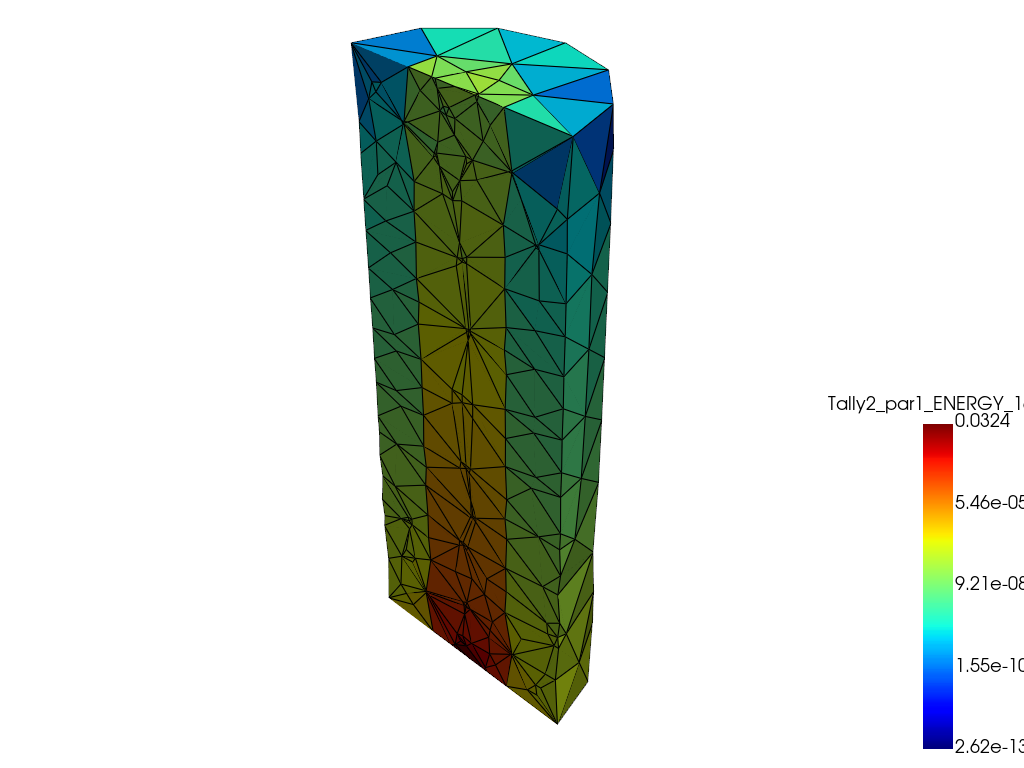

In [35]:
# import pyvista as pv

# # As usual it is possible to directly work with the PyVista object
# plotter = pv.Plotter()
# plotter.add_mesh(eeout.grid.clip(), scalars='Tally2_par1_ENERGY_16 - value',
#                  log_scale=True, cmap='jet', show_edges=True,
#                  scalar_bar_args={'vertical': True})
# plotter.show(jupyter_backend='static')


In [36]:
# or export it to .vtu to use it for instance in ParaView
import tempfile  # only for tmp directory

outfolder = tempfile.gettempdir()
eeout.export(outfolder)